In [2]:
import numpy as np
from numpy.linalg import cholesky
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import math

In [3]:
def density_fn(mu, sigma, purpose='density_curve'):
    sx, sy = np.sqrt(sigma[0][0]), np.sqrt(sigma[1][1])
    cov = sigma[0][1]
    if purpose == 'density_curve':
        s_max = max(sx, sy)
        x = np.linspace(mu[0] - 3 * s_max, mu[0] + 3 * s_max, 1000)
        y = np.linspace(mu[1] - 3 * s_max, mu[1] + 3 * s_max, 1000)
    elif purpose == 'decision_surfaces':
        x = np.linspace(-50, 50, 2000)
        y = np.linspace(-50, 50, 2000)

    X, Y = np.meshgrid(x, y)
    rho = cov / (sx * sy)
    a = 1 / (2 * math.pi * sx * sy * np.sqrt(1 - rho ** 2))
    b1 = -1 / (2 * (1 - rho ** 2))
    b2 = ((X - mu[0]) / sx) ** 2
    b3 = ((Y - mu[1]) / sy) ** 2
    b4 = 2 * rho * (X - mu[0]) * (Y - mu[1]) / (sx * sy)
    Z = a * np.exp(b1 * (b2 + b3 - b4))
    if purpose == 'density_curve':
        plt.contour(X, Y, Z)
    elif purpose == 'decision_surfaces':
        return Z

def normal2d_plot(mu1, sigma1, 
                  mu2, sigma2, 
                  sample_num = 10000, 
                  spot = True, 
                  density_curve = True,
                  decision_surfaces = True,
                  plot_3d = False,
                  threshold = 1e-50):
    if plot_3d == True:
        spot = density_curve = decision_surfaces = False
        
    plt.figure(figsize=(10,10))
    x_major_locator=MultipleLocator(2.5)
    y_major_locator=MultipleLocator(2.5)
    ax=plt.gca()
    ax.xaxis.set_major_locator(x_major_locator)
    ax.yaxis.set_major_locator(y_major_locator)
    plt.xlim(-7.5,20)
    plt.ylim(-7.5,20)
    if spot:
        specimen1 = np.random.multivariate_normal(mu1, sigma1, sample_num)
        specimen2 = np.random.multivariate_normal(mu2, sigma2, sample_num)

        plt.plot(*specimen1.T,',',label = 'specimen1')
        plt.plot(*specimen2.T,',',label = 'specimen2')
    if density_curve:
        density_fn(mu1, sigma1, purpose = 'density_curve')
        density_fn(mu2, sigma2, purpose = 'density_curve')
    if decision_surfaces:
        Z1 = density_fn(mu1, sigma1, purpose = 'decision_surfaces')
        Z2 = density_fn(mu2, sigma2, purpose = 'decision_surfaces')
        idx = (Z1 - Z2) <= threshold
        x = np.linspace(-50, 50, 2000)
        y = np.linspace(-50, 50, 2000)
        plt.contour(x,y,idx)
    if plot_3d:
        Z1 = density_fn(mu1, sigma1, purpose = 'decision_surfaces')
        Z2 = density_fn(mu2, sigma2, purpose = 'decision_surfaces')
        x = np.linspace(-50, 50, 2000)
        y = np.linspace(-50, 50, 2000)
        ax3d = plt.axes(projection='3d')
        ax3d = plt.axes(projection='3d')
        ax3d.contour3D(x, y, (Z1 + Z2), 100)
        ax3d.set_xlabel('x')
        ax3d.set_ylabel('y')
        ax3d.set_zlabel('z')
        ax3d.set_xlim(-7.5,20)
        ax3d.set_ylim(-7.5,20)
        ax3d.set_zlim(0, 0.05)

/home/asuka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


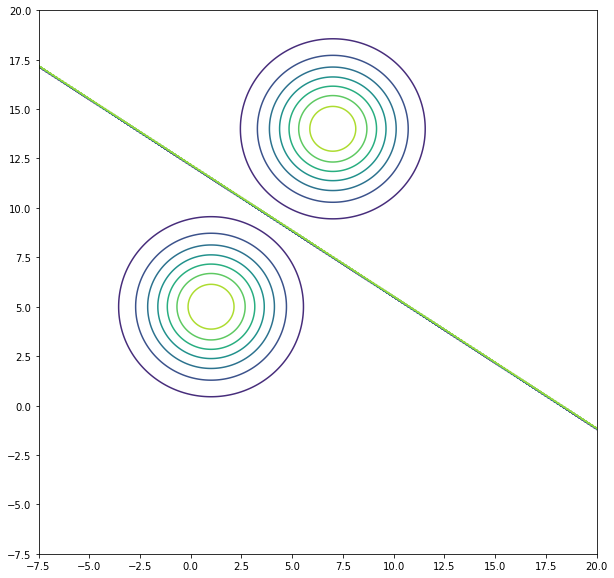

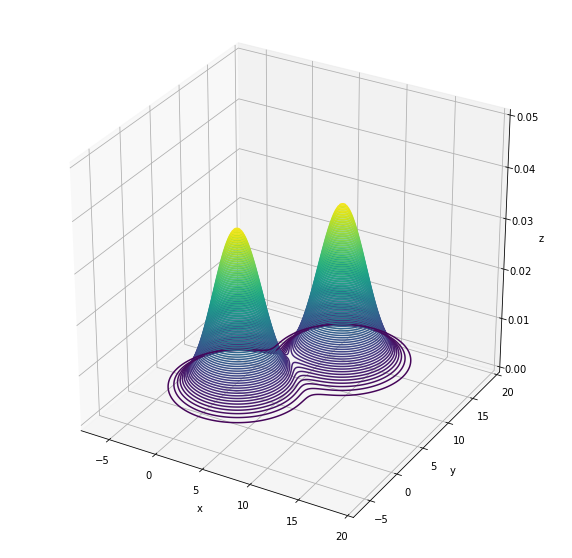

In [4]:
# 1-1
mu1 = [1, 5]
sigma1 = [[5, 0], [0, 5]]
mu2 = [7, 14]
sigma2 = [[5, 0], [0, 5]]

normal2d_plot(mu1, sigma1, mu2, sigma2, sample_num = 10000, spot = False,decision_surfaces = True)
normal2d_plot(mu1, sigma1, mu2, sigma2, sample_num = 100, plot_3d = True)

W:\Anaconda\lib\site-packages\ipykernel_launcher.py:65: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


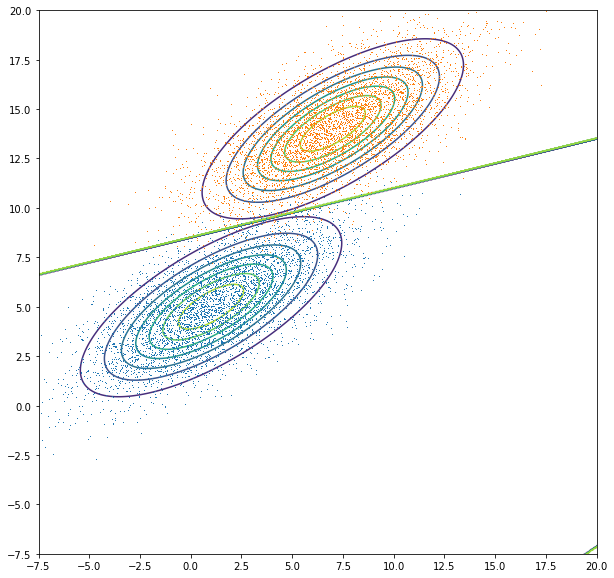

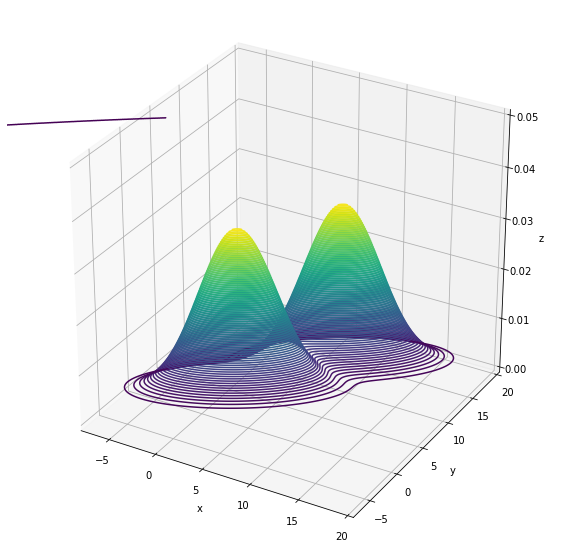

In [4]:
# 1-2
mu1 = [1, 5]
sigma1 = [[10, 5], [5, 5]]
mu2 = [7, 14]
sigma2 = [[10, 5], [5, 5]]

normal2d_plot(mu1, sigma1, mu2, sigma2, sample_num = 5000)
normal2d_plot(mu1, sigma1, mu2, sigma2, sample_num = 10000, plot_3d = True)

W:\Anaconda\lib\site-packages\ipykernel_launcher.py:65: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


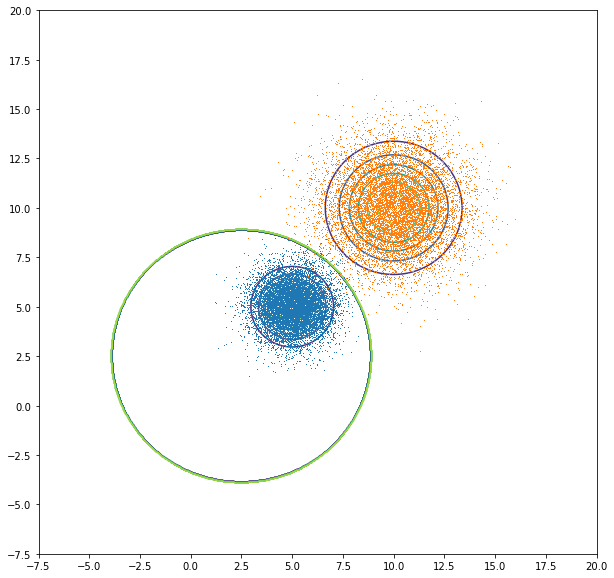

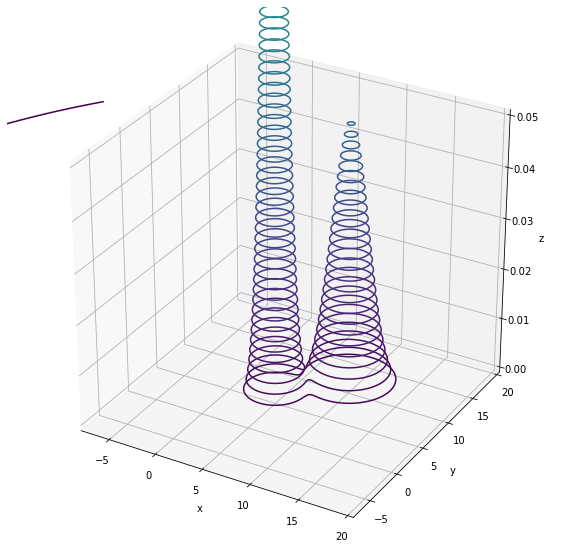

In [5]:
# 圆
mu1 = [5, 5]
sigma1 = [[1, 0], [0, 1]]
mu2 = [10, 10]
sigma2 = [[3, 0], [0, 3]]

normal2d_plot(mu1, sigma1, mu2, sigma2, sample_num = 10000, spot = True,decision_surfaces = True)
normal2d_plot(mu1, sigma1, mu2, sigma2, sample_num = 100, plot_3d = True)

W:\Anaconda\lib\site-packages\ipykernel_launcher.py:65: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


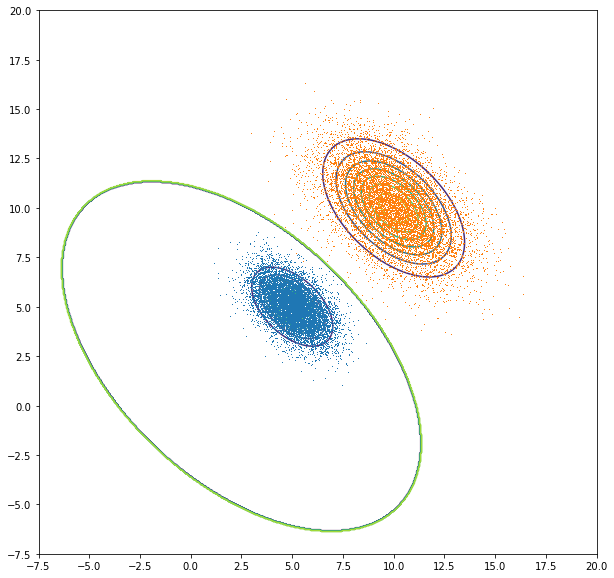

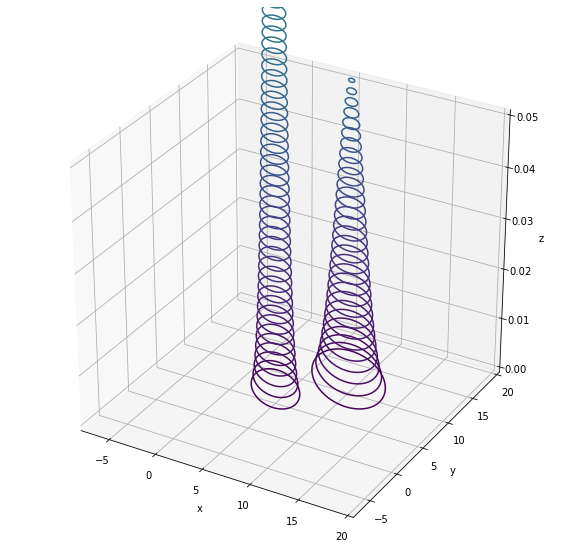

In [6]:
# 椭圆
mu1 = [5, 5]
sigma1 = [[1, -0.5], [-0.5, 1]]
mu2 = [10, 10]
sigma2 = [[3, -1.5], [-1.5, 3]]

normal2d_plot(mu1, sigma1, mu2, sigma2, sample_num = 10000, spot = True,decision_surfaces = True)
normal2d_plot(mu1, sigma1, mu2, sigma2, sample_num = 100, plot_3d = True)

W:\Anaconda\lib\site-packages\ipykernel_launcher.py:65: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


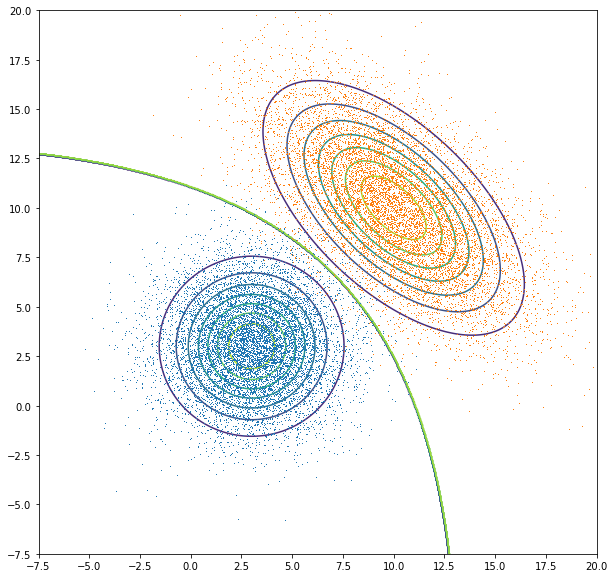

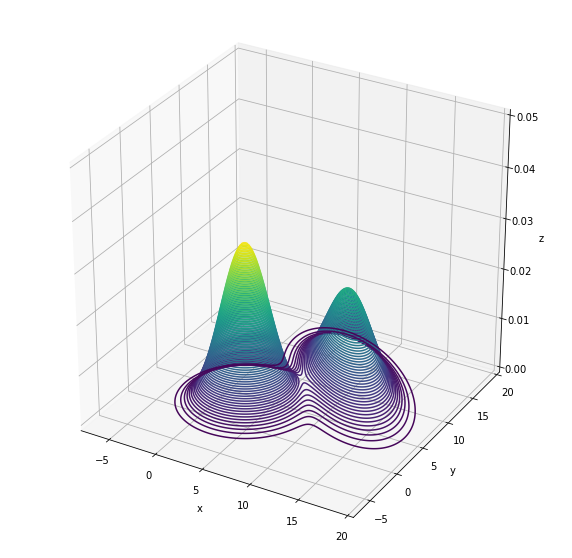

In [7]:
# 抛物线
mu1 = [3, 3]
sigma1 = [[5, 0], [0, 5]]
mu2 = [10, 10]
sigma2 = [[10, -6], [-6, 10]]

normal2d_plot(mu1, sigma1, mu2, sigma2, sample_num = 10000, spot = True,decision_surfaces = True)
normal2d_plot(mu1, sigma1, mu2, sigma2, sample_num = 100, plot_3d = True)

W:\Anaconda\lib\site-packages\ipykernel_launcher.py:65: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


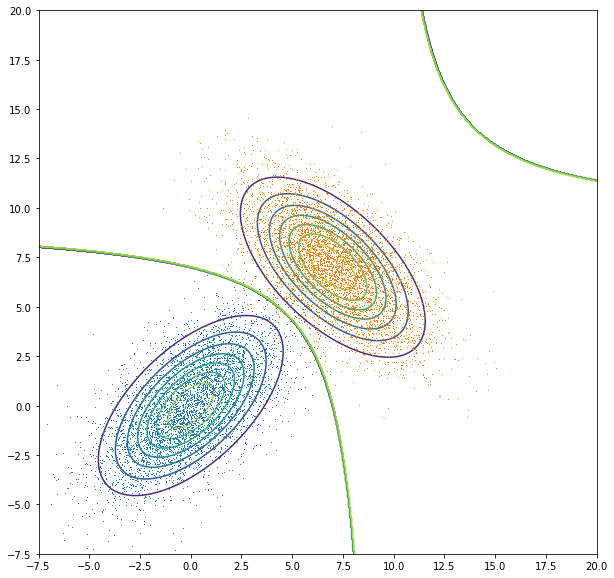

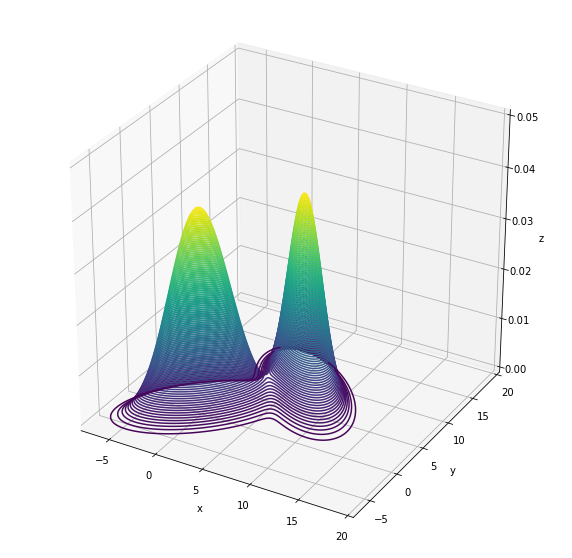

In [8]:
# 双曲线
mu1 = [0, 0]
sigma1 = [[5, 3], [3, 5]]
mu2 = [7, 7]
sigma2 = [[5, -3], [-3, 5]]

normal2d_plot(mu1, sigma1, mu2, sigma2, sample_num = 5000)
normal2d_plot(mu1, sigma1, mu2, sigma2, sample_num = 10000, plot_3d = True)

W:\Anaconda\lib\site-packages\ipykernel_launcher.py:65: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


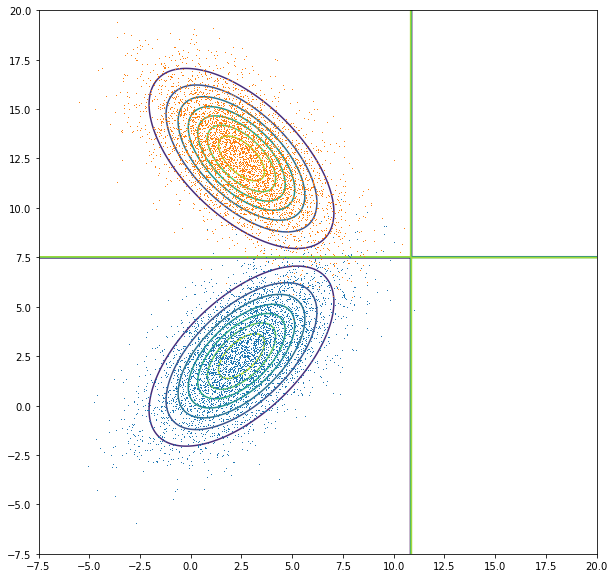

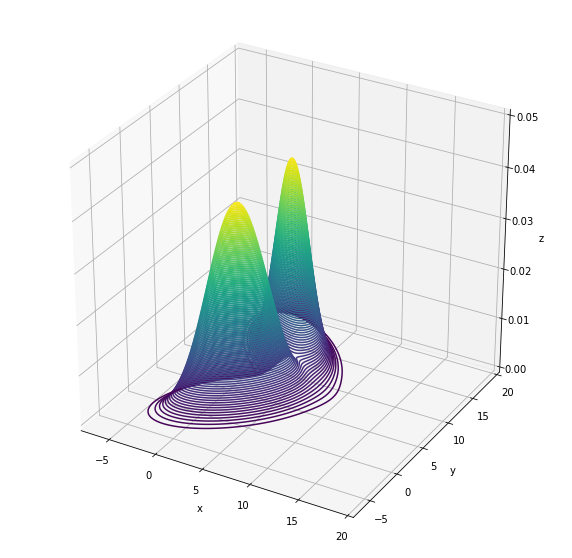

In [9]:
# 直线
mu1 = [2.5,2.5]
sigma1 = [[5, 3], [3, 5]]
mu2 = [2.5,12.5]
sigma2 = [[5, -3], [-3, 5]]

normal2d_plot(mu1, sigma1, mu2, sigma2, sample_num = 5000)
normal2d_plot(mu1, sigma1, mu2, sigma2, sample_num = 10000, plot_3d = True)

W:\Anaconda\lib\site-packages\ipykernel_launcher.py:65: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


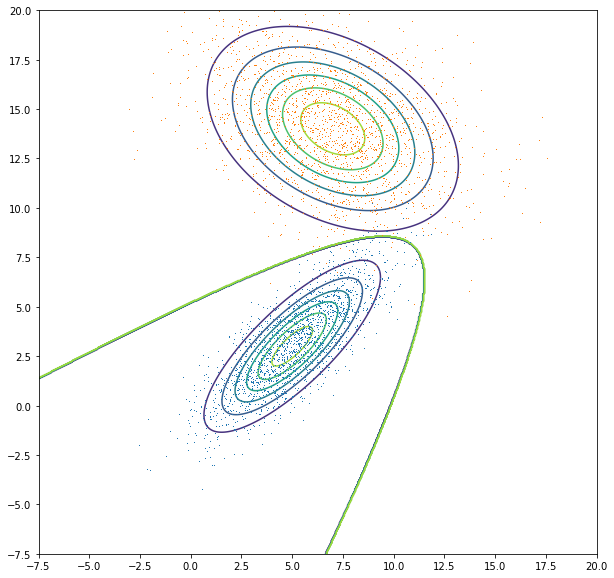

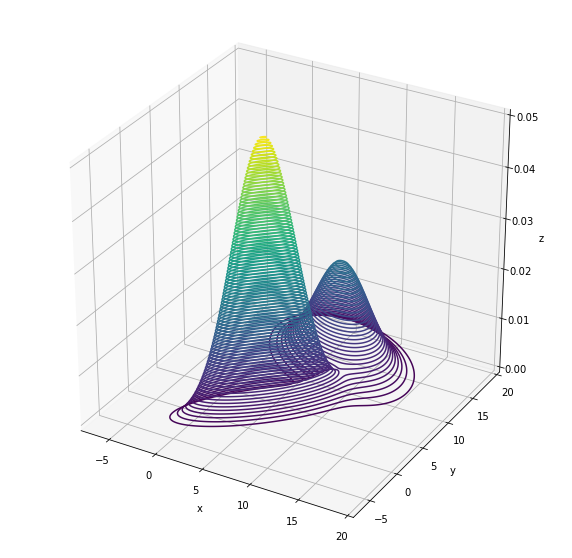

In [10]:
# 某种一般情况
mu1 = [5, 3]
sigma1 = [[5, 4], [4, 5]]
mu2 = [7, 14]
sigma2 = [[10, -3], [-3, 7]]

normal2d_plot(mu1, sigma1, mu2, sigma2, sample_num = 2000)
normal2d_plot(mu1, sigma1, mu2, sigma2, sample_num = 10000, plot_3d = True)